In [11]:
import dect_function
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tables
import pandas as pd


In [12]:

algos = [LocalOutlierFactor(n_neighbors=20, algorithm="auto", leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination=0.05, novelty=False, n_jobs=None),
    EllipticEnvelope( store_precision=True, assume_centered=False, support_fraction=None, contamination=0.02, random_state=2),
    OneClassSVM(kernel="rbf", degree=2, gamma="scale", coef0=0, tol=0.2, nu=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1),
    IsolationForest(n_estimators=200, max_samples="auto", contamination=0.02, max_features=1, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)]
path = "../data_sets/insurance.csv"
df = pd.read_csv(path)
df['sex'] = df['sex'].map({'female': 0, 'male':1})
df['region'] = df['region'].map({'southwest': 0, 'southeast':1,'northwest':3,'northeast':4})
df['smoker'] = df['smoker'].map({'yes': 0, 'no':1})
# print(np.isnan(df.any())) #and gets False
# print(np.isfinite(df.all())) #and gets True
df = dect_function.clean_dataset(df)

acc = dect_function.improvement_test_regression(df,algos)
for ac in acc:
    print(ac)
    


{'mean_squared_error': 35609191.26649468, 'mean_absolute_error': 4079.335465780658}
{'mean_squared_error': 35367398.806887716, 'mean_absolute_error': 4156.553117222606}
{'mean_squared_error': 35634212.92802476, 'mean_absolute_error': 4071.3089184814703}
{'mean_squared_error': 35464712.46093612, 'mean_absolute_error': 4128.648050875483}
{'mean_squared_error': 35653497.905718625, 'mean_absolute_error': 4041.7178661404787}


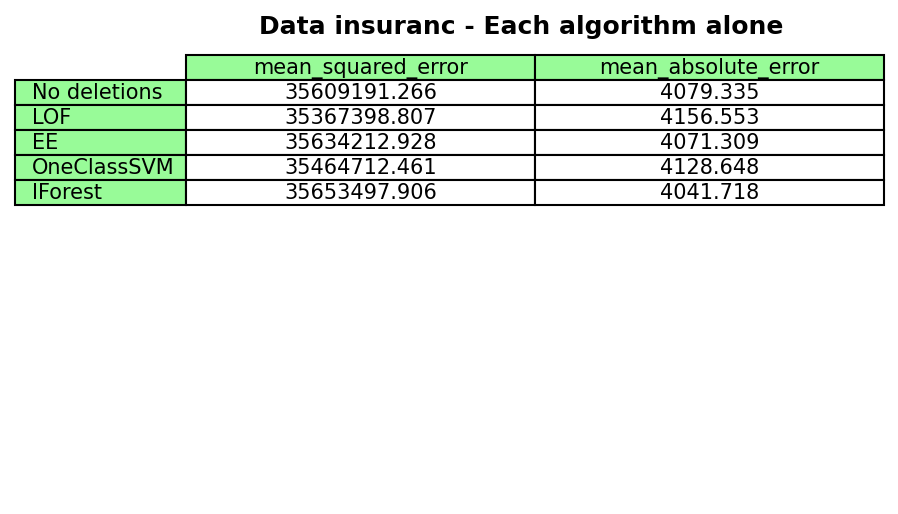

In [13]:
tables.algo_alone(acc ,"Part 1 - Data insuranc")

In [14]:
acc2 = dect_function.delete_all(df,[algos[0],algos[3]])
# acc2 = dect_function.delete_all(df,[algos[0],algos[1],algos[3],algos[2]])
print(acc2)
#[algos[0],algos[1],algos[3],algos[2]]

{'mean_squared_error': 35393428.8099076, 'mean_absolute_error': 4146.800309417156}


In [15]:

acc3 = dect_function.Add_and_delete(df,[algos[0],algos[3]])
print(acc3)

{'mean_squared_error': 35621602.940838404, 'mean_absolute_error': 4053.6290344901236}


In [26]:

acc4 = dect_function.uniformy_average(df,[algos[2],algos[3]])
print(acc4)


{'mean_squared_error': 35482634.931458764, 'mean_absolute_error': 4108.674001153925}


In [24]:

algos2 = [algos[2],algos[3]]
ratio = [0.7,0.3]

acc5 = dect_function.ratio_average(df,algos2,ratio,6)
print(acc5)

{'mean_squared_error': 35420580.0754329, 'mean_absolute_error': 4079.8203097480746}


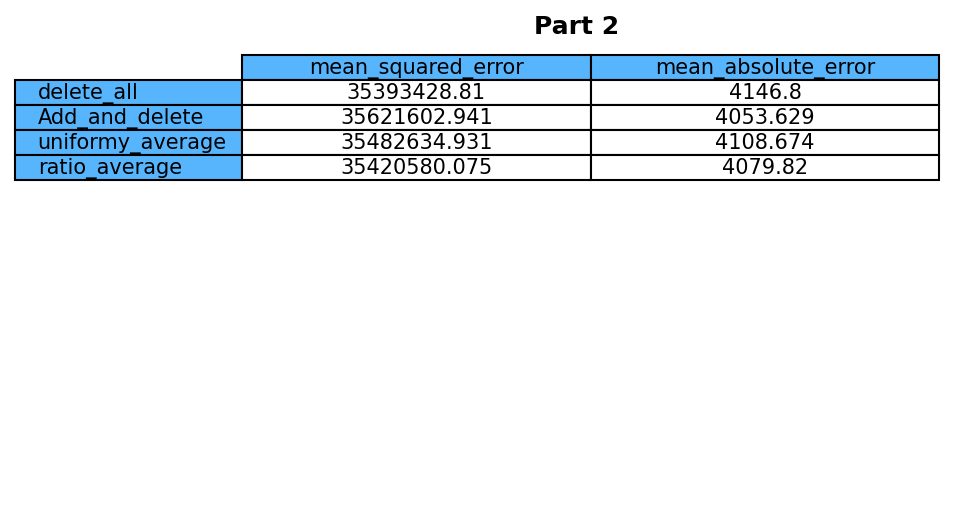

In [27]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 2 - Data insuranc",val2)

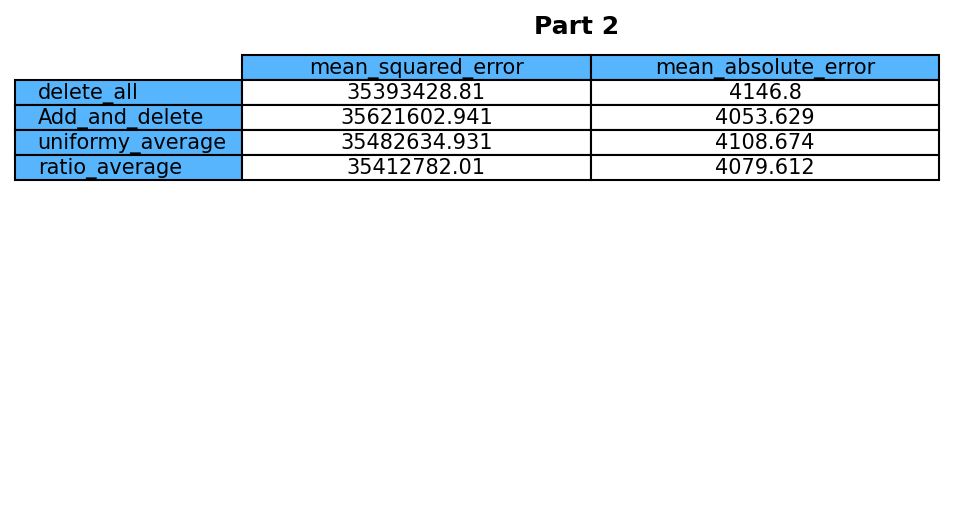

In [19]:
val2 = ["delete_all","Add_and_delete","uniformy_average","ratio_average"]
list_acc = [acc2,acc3,acc4,acc5]

tables.part2(list_acc,"Part 3 - Data insuranc",val2)

In [20]:

best_result = acc[0].copy()
dd = dect_function.combination(df,algos,best_result)
acc.append(best_result)
for a in acc:
    print(a)
print(best_result)
print(dd)


{'mean_squared_error': 35609191.26649468, 'mean_absolute_error': 4079.335465780658}
{'mean_squared_error': 35367398.806887716, 'mean_absolute_error': 4156.553117222606}
{'mean_squared_error': 35634212.92802476, 'mean_absolute_error': 4071.3089184814703}
{'mean_squared_error': 35464712.46093612, 'mean_absolute_error': 4128.648050875483}
{'mean_squared_error': 35653497.905718625, 'mean_absolute_error': 4041.7178661404787}
{'mean_squared_error': 35367398.806887716, 'mean_absolute_error': 4071.3089184814703}
{'mean_squared_error': 35367398.806887716, 'mean_absolute_error': 4071.3089184814703}
{'mean_squared_error': array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
      

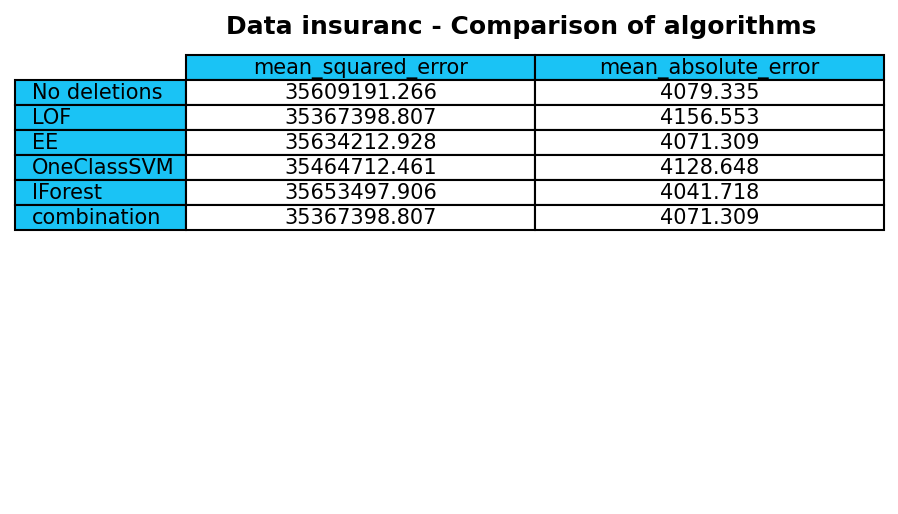

In [21]:
tables.algo_combination(acc,"Data insuranc - Comparison of algorithms")